In [196]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import numpy as np


In [197]:
# Reading the dataset
data= pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [198]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Dividing into Positive and Negative Reviews

In [199]:
print("The number of Positive reviews=", (data["Liked"]==1).sum())
print("The number of Negative reviews=", (data["Liked"]==0).sum())

The number of Positive reviews= 500
The number of Negative reviews= 500


In [200]:
len(data)

1000

In [201]:
def word_cloud(text,t):

    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='pink', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 8)) 

    # Show image
    plt.imshow(word_cloud) 
    
    # Show title 
    plt.title(t)
    
    # Remove Axis
    plt.axis("off")  
    
    # show plot
    plt.show()

    

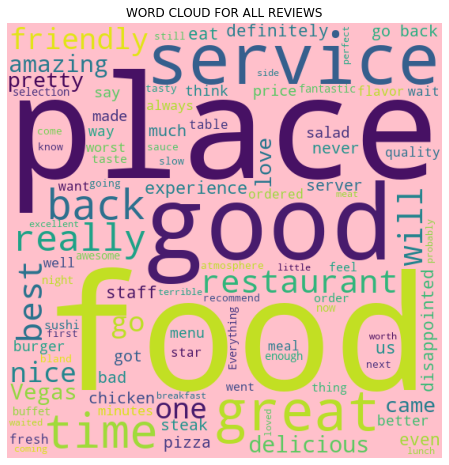

In [202]:
#Word Cloud for all reviews
paragraph=' '.join(data.Review.tolist())
word_cloud(paragraph,"WORD CLOUD FOR ALL REVIEWS")   

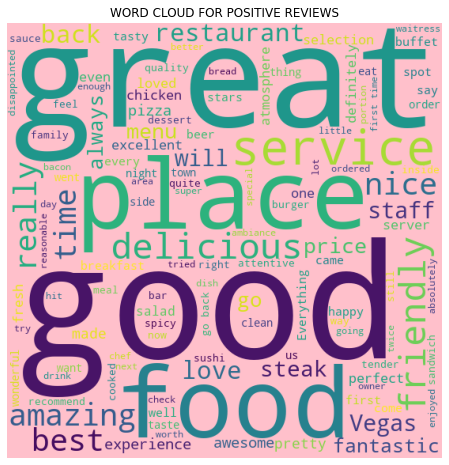

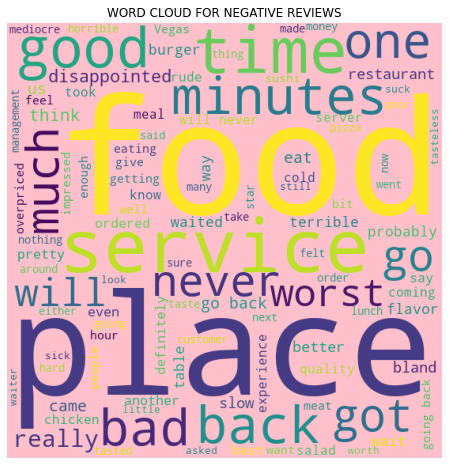

In [203]:
#Word Cloud for poitive reviews
paragraph=' '.join(data[data.Liked==1].Review.tolist())
word_cloud(paragraph,"WORD CLOUD FOR POSITIVE REVIEWS")

#Word cloud for negative reviews
paragraph=' '.join(data[data.Liked==0].Review.tolist())
word_cloud(paragraph, "WORD CLOUD FOR NEGATIVE REVIEWS")

1. The wordcloud makes it clear which words are more common.
2. Positive words are in abundant.
3. The Wordclod for positive reviews sggests that great and good seem to be the largest most abundant words.
4. The Wordcloud fo negative reviews makes it clear why these reviews fall under negative reviews, words which might be used in a complain are used here. 



### CONCLUSION

1. The chief consumer reviews can be used to understand the pros and cons of the restaurant. 
2. The main key words of the positive and negative reviews do give a gist of the customer sentiment. 
3. Such analysis with larger amounts of data can help us understand how the restaurant is going to perform.

### PREPROCESSING DATASET

Each review undergoes through a preprocessing step, where all the vague information is removed.

* Removing the Stopwords, numeric and speacial charecters.
* Normalizing each review using the approach of stemming.

In [204]:
nltk.download('stopwords')
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vectorization

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [205]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

### Training and Classification

Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.

**Classification Algorithms:**

Algorithms like Decision tree, Random Forest, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

* Multinomial Naive Bayes
* Bernoulli Naive Bayes
* Logistic Regression

In [206]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Multinomial NB**



Accuracy is  77.67
Precision is  0.78
Recall is  0.77


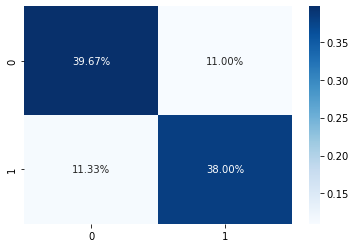

In [207]:
# Multinomial NB
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb_classifier = MultinomialNB(alpha=0.1)
mnb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred =mnb_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%',cmap='Blues')

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
mnbscore1 = accuracy_score(y_test,y_pred)
mnbscore2 = precision_score(y_test,y_pred)
mnbscore3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(mnbscore1*100,2))
print("Precision is ",round(mnbscore2,2))
print("Recall is ",round(mnbscore3,2))

**Bernoulli NB**



Accuracy is  77.0
Precision is  0.76
Recall is  0.78


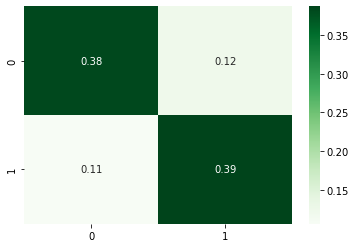

In [208]:
# Bernoulli NB
import seaborn as sns
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
bnb_classifier = BernoulliNB(alpha=0.8)
bnb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = bnb_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Greens')

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
bnbscore1 = accuracy_score(y_test,y_pred)
bnbscore2 = precision_score(y_test,y_pred)
bnbscore3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(bnbscore1*100,2))
print("Precision is ",round(bnbscore2,2))
print("Recall is ",round(bnbscore3,2))

**Logistic Regression**



Accuracy is  76.67
Precision is  0.8
Recall is  0.71


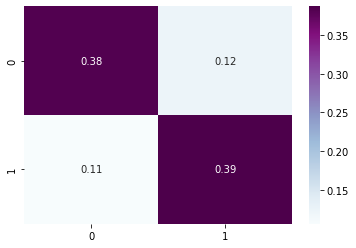

In [209]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
lr_classifier = linear_model.LogisticRegression(C=1.5)
lr_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred =lr_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(cm/np.sum(cm), annot=True, cmap='BuPu')

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lrscore1 = accuracy_score(y_test,y_pred)
lrscore2 = precision_score(y_test,y_pred)
lrscore3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(lrscore1*100,2))
print("Precision is ",round(lrscore2,2))
print("Recall is ",round(lrscore3,2))

### Analysis and Conclusion

In this Project, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Three algorithms namely Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression are implemented.

Evaluation metrics used here are accuracy, precision and recall.

Using Multinomial Naive Bayes,

* Accuracy of prediction is 77.67%.
* Precision of prediction is 0.78.
* Recall of prediction is 0.77.

Using Bernoulli Naive Bayes,

* Accuracy of prediction is 77.0%.
* Precision of prediction is 0.76.
* Recall of prediction is 0.78.

Using Logistic Regression,

* Accuracy of prediction is 76.67%.
* Precision of prediction is 0.8.
* Recall of prediction is 0.71.
From the above results, Multinomial Naive Bayes is slightly better method compared to Bernoulli Naive Bayes and Logistic Regression, with 77.67% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 77.67% right prediction.

### Saving the Multinomial Naive Bayes Model

In [212]:
#saving the model
import pickle
filename = 'review_classifier.sav'
pickle.dump(mnb_classifier, open(filename, 'wb'))
with open('corpus.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(corpus, filehandle)